<a href="https://colab.research.google.com/github/SrAyush31/Covid-19-Outbreak-Pred-Visual/blob/main/Covid_19_Outbreak_Pred%26Visual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Covid-19 Outbreak Prediction & Visualisation**

In [1]:
!unzip -q /content/content.zip

# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('covid_19_clean_complete.csv',parse_dates=['Date'])
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0


In [4]:
df.rename(columns={'Date': 'date',
                    'Province/State':'state', 
                    'Country/Region':'country',
                    'Lat':'lat', 'Long':'long',
                    'Confirmed':'confirmed',
                    'Deaths':'deaths',
                    'Recovered':'recovered'},
                    inplace = True)


In [5]:
df['active'] = df['confirmed'] - df['deaths'] - df['recovered']

In [6]:
top = df[df['date']==df['date'].max()]
world = top.groupby('country')['confirmed','active','deaths'].sum().reset_index()
world.head()

,country,confirmed,active,deaths
0,Afghanistan,40.0,38.0,1.0
1,Albania,89.0,85.0,2.0
2,Algeria,201.0,119.0,17.0
3,Andorra,113.0,111.0,1.0
4,Angola,2.0,2.0,0.0


In [8]:
figure = px.choropleth(world, locations= 'country',
                       locationmode = 'country names', color = 'active',
                       hover_name = 'country', range_color = [1,1000],
                       color_continuous_scale = 'Peach',
                       title = 'countries with active cases')
figure.show()

[Text(0, 0.5, 'Total cases'), Text(0.5, 0, 'Dates')]

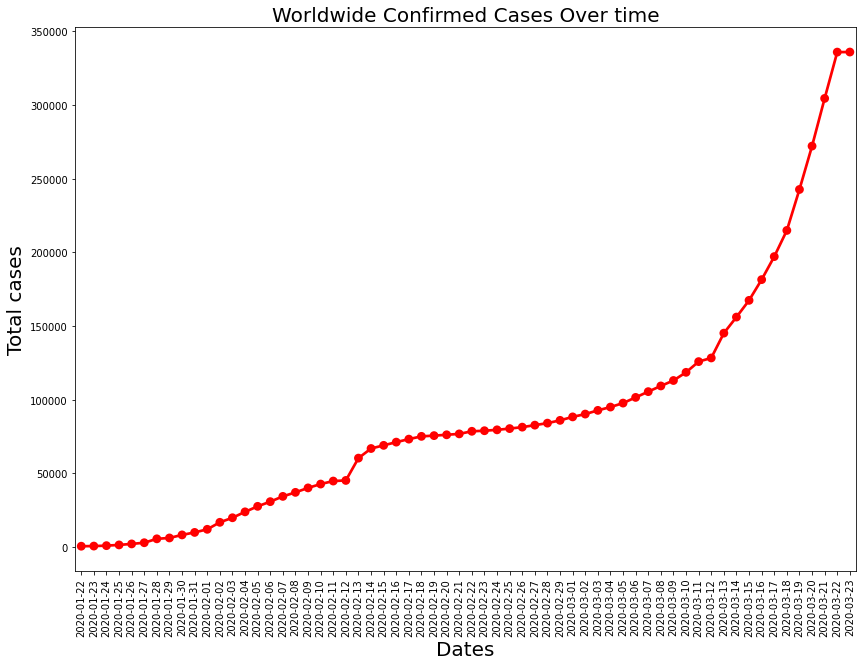

In [9]:
plt.figure(figsize = (14,10))
plt.xticks(rotation = 90 , fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('dates',fontsize =20)
plt.ylabel('Total cases',fontsize = 20)
plt.title('Worldwide Confirmed Cases Over time',fontsize = 20)
total_cases = df.groupby('date')['date','confirmed'].sum().reset_index()
total_cases['date'] = pd.to_datetime(total_cases['date'])


ax = sns.pointplot(x= total_cases.date.dt.date , y = total_cases.confirmed , color = 'r')
ax.set(xlabel='Dates', ylabel = 'Total cases')

In [10]:
top_actives = top.groupby(by= 'country')['active'].sum().sort_values(ascending = False).head(20).reset_index()


In [11]:
top_actives

,country,active
0,Italy,46638.0
1,US,32681.0
2,Germany,24513.0
3,Spain,24421.0
4,France,13170.0
5,Iran,12022.0
6,Switzerland,7016.0
7,South Korea,5884.0
8,United Kingdom,5392.0
9,China,5351.0


[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total cases')]

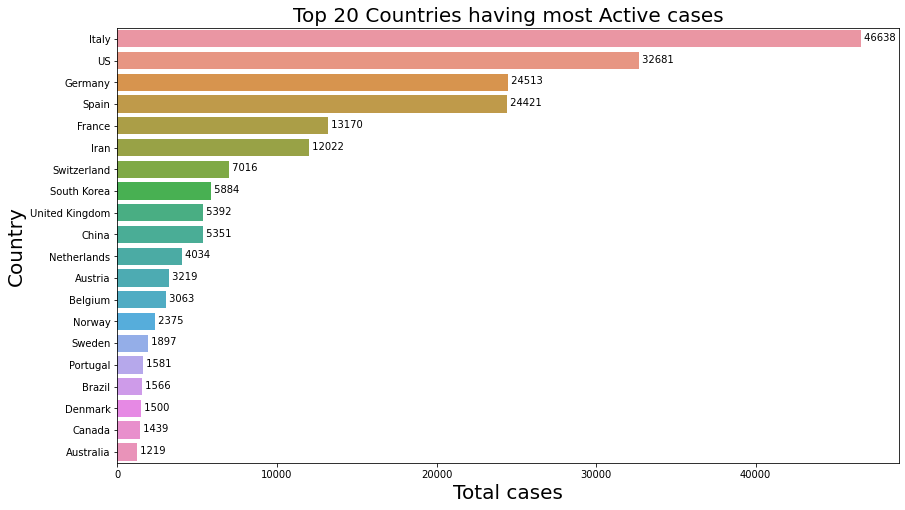

In [12]:
plt.figure(figsize = (14,8))
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Total cases',fontsize =20)
plt.ylabel('Country',fontsize = 20)
plt.title('Top 20 Countries having most Active cases',fontsize = 20)
ax = sns.barplot(x = top_actives.active, y = top_actives.country)
for i ,(value, name) in enumerate(zip(top_actives.active, top_actives.country)):
  ax.text(value, i-.05,f'{value: .0f}', size = 10 , ha ='left', va = 'center')
ax.set(xlabel='Total cases', ylabel='Country')

In [13]:
top_deaths = top.groupby(by= 'country')['deaths'].sum().sort_values(ascending = False).head(20).reset_index()


[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total cases')]

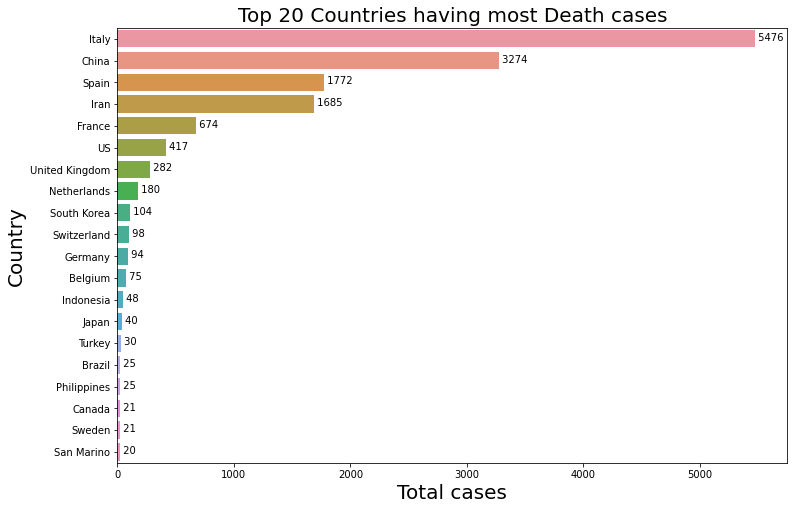

In [14]:
plt.figure(figsize = (12,8))
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Total cases',fontsize =20)
plt.ylabel('Country',fontsize = 20)
plt.title('Top 20 Countries having most Death cases',fontsize = 20)
ax = sns.barplot(x = top_deaths.deaths, y = top_deaths.country)
for i ,(value, name) in enumerate(zip(top_deaths.deaths, top_deaths.country)):
  ax.text(value, i-.05,f'{value: .0f}', size = 10 , ha ='left', va = 'center')
ax.set(xlabel='Total cases', ylabel='Country')

In [15]:
top_recovered = top.groupby(by= 'country')['recovered'].sum().sort_values(ascending = False).head(20).reset_index()


[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total cases')]

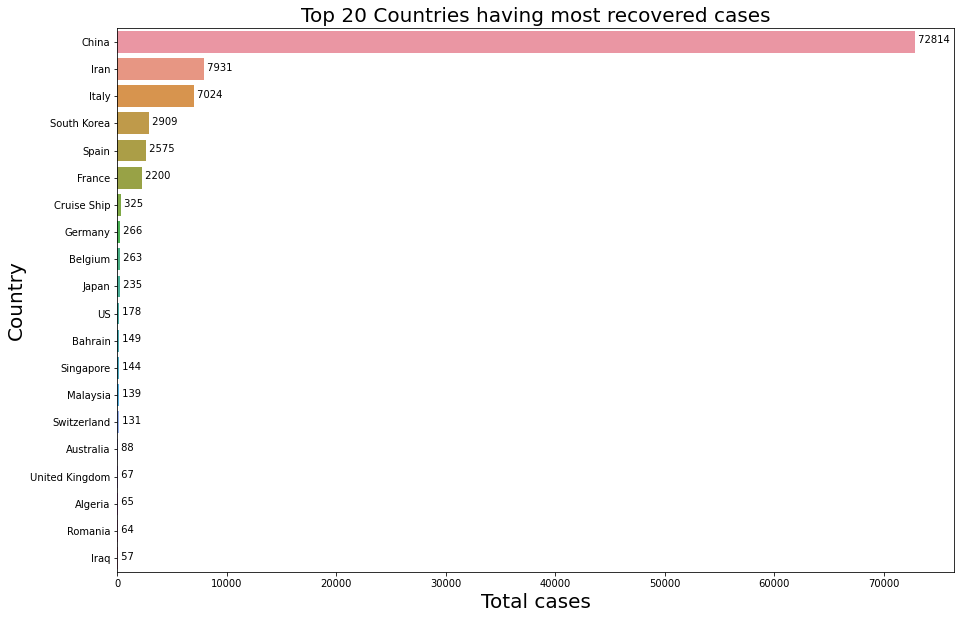

In [16]:
plt.figure(figsize = (15,10))
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Total cases',fontsize =20)
plt.ylabel('Country',fontsize = 20)
plt.title('Top 20 Countries having most recovered cases',fontsize = 20)
ax = sns.barplot(x = top_recovered.recovered, y = top_recovered.country)
for i ,(value, name) in enumerate(zip(top_recovered.recovered, top_deaths.country)):
  ax.text(value, i-.05,f'{value: .0f}', size = 10 , ha ='left', va = 'center')
ax.set(xlabel='Total cases', ylabel='Country')

In [7]:
china = df[df.country == 'China']
china = china.groupby(by = 'date')['recovered','deaths','confirmed','active'].sum().reset_index()

In [8]:
us = df[df.country == 'US']
us = us.groupby(by = 'date')['recovered','deaths','confirmed','active'].sum().reset_index()
us = us.iloc[33:].reset_index().drop('index',axis = 1)

In [9]:
Italy = df[df.country == 'Italy']
Italy = Italy.groupby(by = 'date')['recovered','deaths','confirmed','active'].sum().reset_index()
Italy = Italy.iloc[33:].reset_index().drop('index',axis = 1)

In [10]:
India = df[df.country == 'India']
India = India.groupby(by = 'date')['recovered','deaths','confirmed','active'].sum().reset_index()
India = India.iloc[33:].reset_index().drop('index',axis = 1)

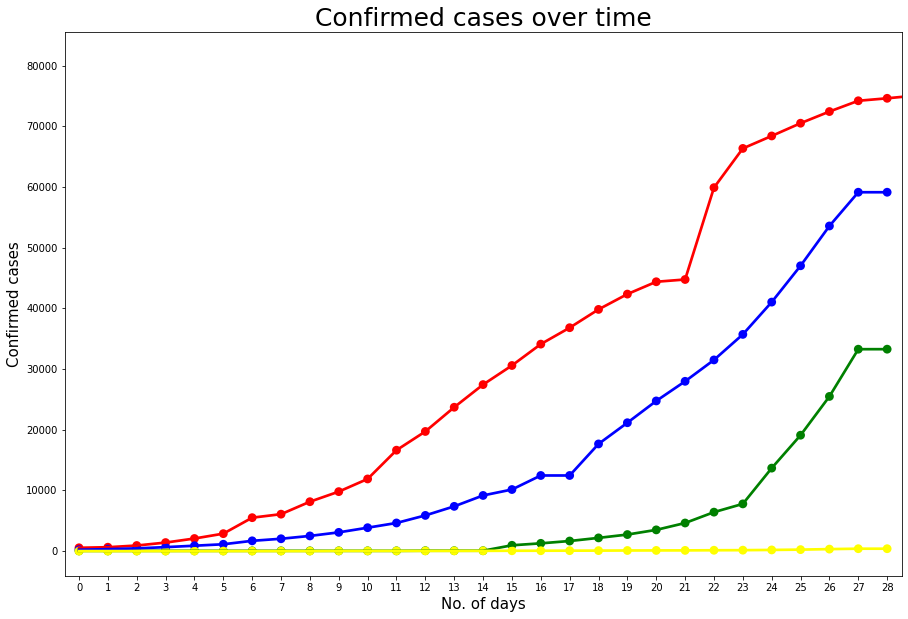

In [11]:
plt.figure(figsize=(15,10))
sns.pointplot(china.index, china.confirmed, color = 'Red')
sns.pointplot(us.index, us.confirmed, color = 'Green')
sns.pointplot(Italy.index, Italy.confirmed, color = 'Blue')
sns.pointplot(India.index, India.confirmed, color = 'Yellow')

plt.title('Confirmed cases over time', fontsize = 25)
plt.ylabel('Confirmed cases',fontsize = 15)
plt.xlabel('No. of days', fontsize = 15)
plt.show()


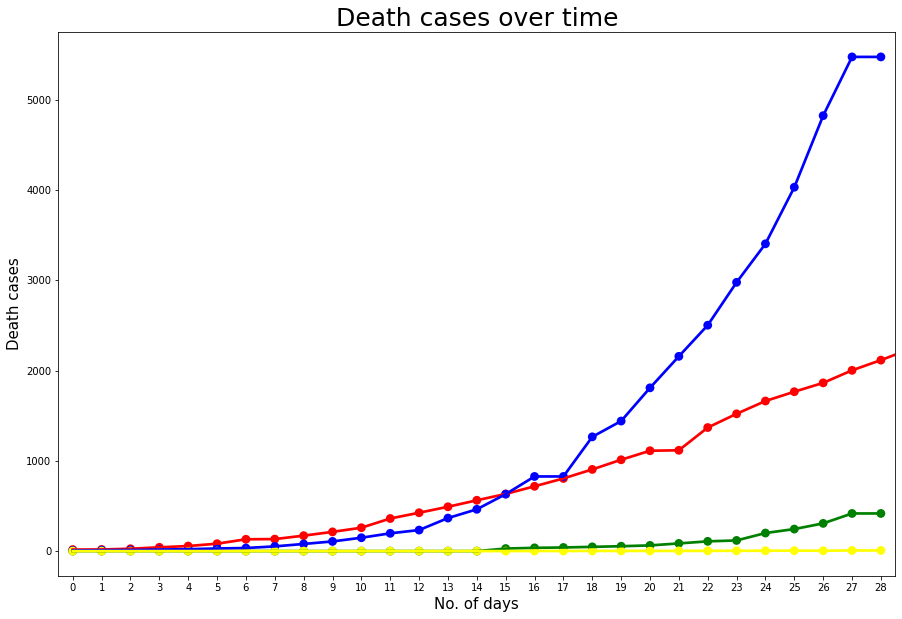

In [ ]:
plt.figure(figsize=(15,10))
sns.pointplot(china.index, china.deaths, color = 'Red')
sns.pointplot(us.index, us.deaths, color = 'Green')
sns.pointplot(Italy.index, Italy.deaths, color = 'Blue')
sns.pointplot(India.index, India.deaths, color = 'Yellow')

plt.title('Death cases over time', fontsize = 25)
plt.ylabel('Death cases',fontsize = 15)
plt.xlabel('No. of days', fontsize = 15)
plt.show()


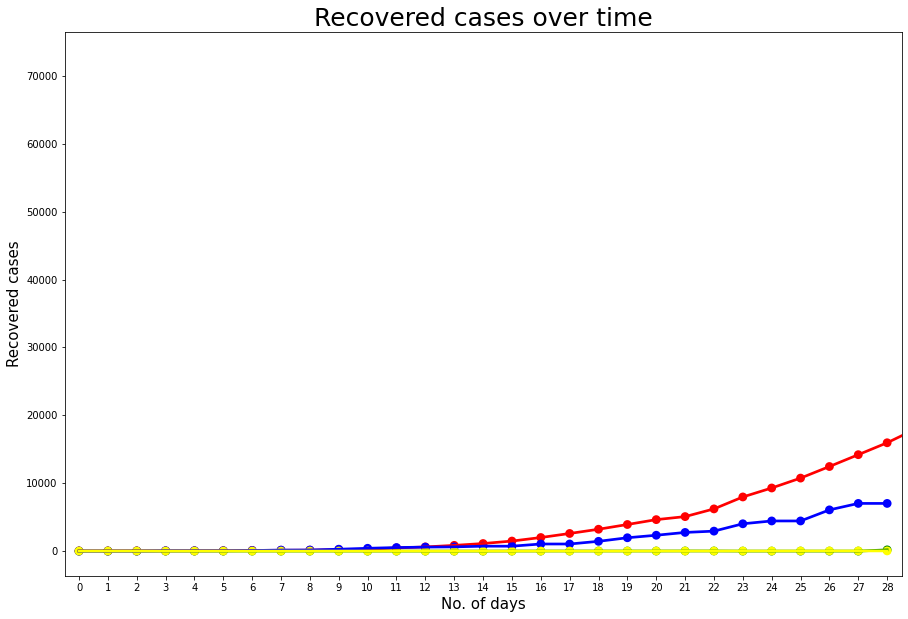

In [ ]:
plt.figure(figsize=(15,10))
sns.pointplot(china.index, china.recovered, color = 'Red')
sns.pointplot(us.index, us.recovered, color = 'Green')
sns.pointplot(Italy.index, Italy.recovered, color = 'Blue')
sns.pointplot(India.index, India.recovered, color = 'Yellow')

plt.title('Recovered cases over time', fontsize = 25)
plt.ylabel('Recovered cases',fontsize = 15)
plt.xlabel('No. of days', fontsize = 15)
plt.show()


# **Machine Learning**

In [26]:
df = pd.read_excel('/content/covid_19_india.xlsx')
df.head()

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,9,0,0,0
1,2,Bihar,3,0,0,1
2,3,Chhattisgarh,1,0,0,0
3,4,Delhi,30,1,6,1
4,5,Gujarat,32,1,0,1


In [27]:
df['Total cases'] = df['Total Confirmed cases (Indian National)'] + df['Total Confirmed cases ( Foreign National )']

In [28]:
dbd_India = pd.read_excel('/content/per_day_cases.xlsx',parse_dates=True,sheet_name='India')
dbd_Italy = pd.read_excel('/content/per_day_cases.xlsx',parse_dates=True,sheet_name='Italy')
dbd_Korea = pd.read_excel('/content/per_day_cases.xlsx',parse_dates=True,sheet_name='Korea')
dbd_Wuhan = pd.read_excel('/content/per_day_cases.xlsx',parse_dates=True,sheet_name='Wuhan')

In [29]:
df['Total Active'] = df['Total cases'] - (df['Death'] + df['Cured'])
total_active = df['Total Active'].sum()
print('Total no of Active Covid-19 cases across India:',total_active)
total_cases = df.groupby('Name of State / UT')['Total Active'].sum().sort_values(ascending = False).to_frame()
total_cases.style.background_gradient(cmap='Blues_r')

Total no of Active Covid-19 cases across India: 512


,Total Active
Name of State / UT,
Kerala,105
Maharashtra,99
Karnataka,37
Telengana,34
Gujarat,32
Rajasthan,29
Punjab,28
Uttar Pradesh,24
Delhi,24


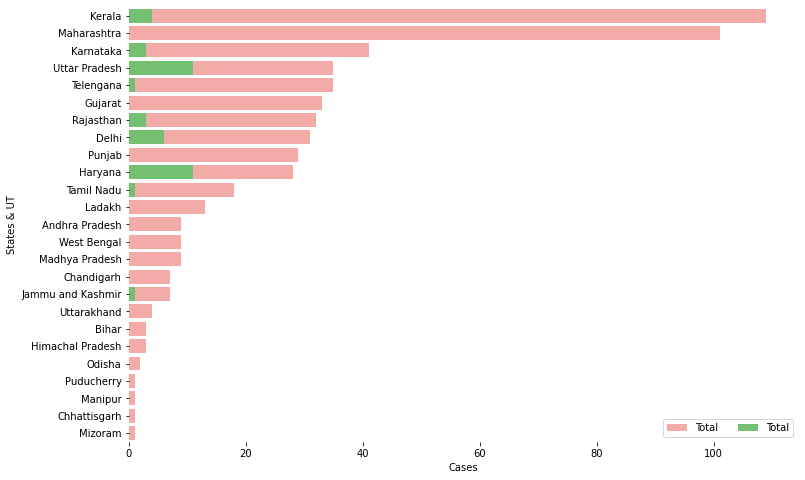

In [30]:
f,ax = plt.subplots(figsize= (12,8))
data = df[['Name of State / UT','Total cases','Cured','Death']]
data.sort_values('Total cases',ascending =False, inplace = True)
sns.set_color_codes('pastel')
sns.barplot(x = 'Total cases', y = 'Name of State / UT', data = data, label = 'Total',color = 'r')

sns.set_color_codes('muted')
sns.barplot(x = 'Cured', y = 'Name of State / UT', data = data, label = 'Total',color = 'g')
ax.legend(ncol =2, loc = 'lower right' ,frameon = True)
ax.set(ylabel='States & UT',xlabel= 'Cases')
sns.despine(left=True, bottom=True)

In [31]:
fig =go.Figure()
fig.add_trace(go.Scatter(x=dbd_India['Date'],y=dbd_India['Total Cases'],mode = 'lines+markers',name='Total Cases'))
fig.update_layout(title_text='Trend of Coronavirus Cases in India',plot_bgcolor='rgb(230,230,230)')
fig.show()

fig = px.bar(dbd_India ,x='Date',y='New Cases',barmode='group',height=400)
fig.update_layout(title_text='Coronavirus cases in India on daily basis',plot_bgcolor='rgb(230,230,230)')
fig.show()


In [32]:
df = pd.read_csv('/content/covid_19_clean_complete.csv',parse_dates=['Date'])
df.rename(columns={'ObservationDate':'Date','Country/Region':'Country'},inplace=True)

df_confirmed = pd.read_csv('/content/time_series_covid19_confirmed_global.csv')
df_recovered = pd.read_csv('/content/time_series_covid19_recovered_global.csv')
df_deaths = pd.read_csv('/content/time_series_covid19_deaths_global.csv')

df_confirmed.rename(columns={'Country/Region':'Country'},inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'},inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'},inplace=True)

In [33]:
df_deaths.head()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,4,4,4,7,9,11,15,17,17,19
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
df2 = df.groupby(['Date','Country','Province/State'])[['Date','Country','Province/State','Confirmed','Deaths','Recovered']].sum().reset_index()
df2.head()

,Date,Country,Province/State,Confirmed,Deaths,Recovered
0,2020-01-22,Australia,Australian Capital Territory,0.0,0.0,0.0
1,2020-01-22,Australia,From Diamond Princess,0.0,0.0,0.0
2,2020-01-22,Australia,New South Wales,0.0,0.0,0.0
3,2020-01-22,Australia,Northern Territory,0.0,0.0,0.0
4,2020-01-22,Australia,Queensland,0.0,0.0,0.0


In [ ]:
df_india = df.query('Country'=='India').groupby('Date')[['Confirmed','Deaths','Recovered']].sum().reset_index()
india_confirmed, india_deaths, india_recovered = df_india[['Date','Confirmed']],df_india[['Date','Deaths']],df_india[['Date','Recovered']]

In [36]:
df.groupby('Date').sum().head()

,Lat,Long,Confirmed,Deaths,Recovered
Date,,,,,
2020-01-22,7777.4793,1639.7021,554.0,17.0,28.0
2020-01-23,7777.4793,1639.7021,652.0,18.0,30.0
2020-01-24,7777.4793,1639.7021,939.0,26.0,36.0
2020-01-25,7777.4793,1639.7021,1432.0,42.0,39.0
2020-01-26,7777.4793,1639.7021,2113.0,56.0,52.0


In [37]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [38]:
fig= go.Figure()
fig.add_trace(go.Scatter(x=confirmed['Date'],y=confirmed['Confirmed'],mode = 'lines+markers',name='Confirmed',line=dict(color='Blue')))
fig.add_trace(go.Scatter(x=deaths['Date'],y=deaths['Deaths'],mode = 'lines+markers',name='Deaths',line=dict(color='Red')))
fig.add_trace(go.Scatter(x=recovered['Date'],y=recovered['Recovered'],mode = 'lines+markers',name='Recovered',line=dict(color="Green")))

fig.update_layout(title_text='Worldwide NCovid-19 Cases',xaxis_tickfont_size=14, yaxis=dict(title="Number of Cases"))
fig.show()

In [39]:
from fbprophet import Prophet

In [40]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [41]:
confirmed.head()

,Date,Confirmed
0,2020-01-22,554.0
1,2020-01-23,652.0
2,2020-01-24,939.0
3,2020-01-25,1432.0
4,2020-01-26,2113.0


In [42]:
confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [43]:
m=Prophet(interval_width=0.95)
m.fit(confirmed)
future=m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [44]:
forcast = m.predict(future)
forcast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,355136.872974,333744.079448,374720.402955
65,2020-03-27,372235.326938,352284.186742,392675.536626
66,2020-03-28,388674.964142,367836.796524,410543.103112
67,2020-03-29,405307.954675,381891.041217,427261.288302
68,2020-03-30,418529.648466,396531.951495,439659.818238


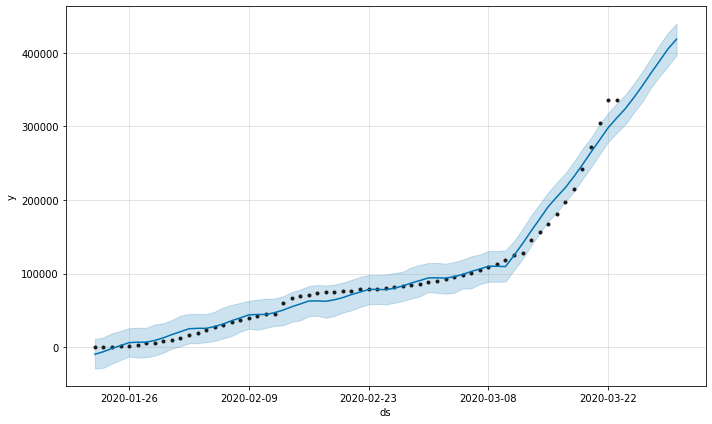

In [45]:
confirmed_forcast_plot = m.plot(forcast)

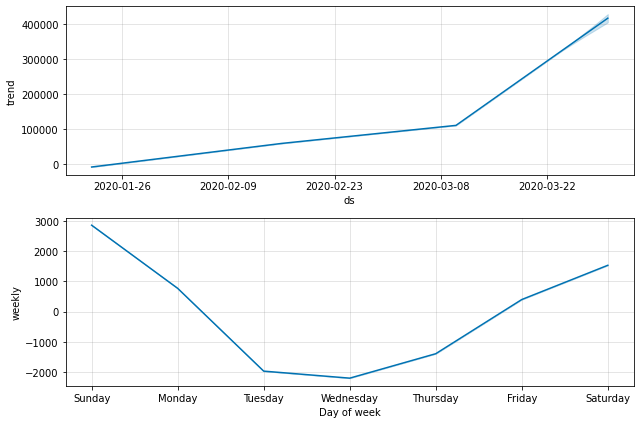

In [46]:
confirmed_forcast_plot = m.plot_components(forcast)

In [47]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [48]:
m=Prophet()
m.fit(deaths)
future=m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [49]:
forcast = m.predict(future)
forcast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,15411.877522,14815.017851,16036.393059
65,2020-03-27,16199.617603,15539.314477,16840.247419
66,2020-03-28,17006.904589,16312.059196,17639.698197
67,2020-03-29,17831.505383,17191.457997,18494.659525
68,2020-03-30,18490.986176,17795.413130,19137.780841


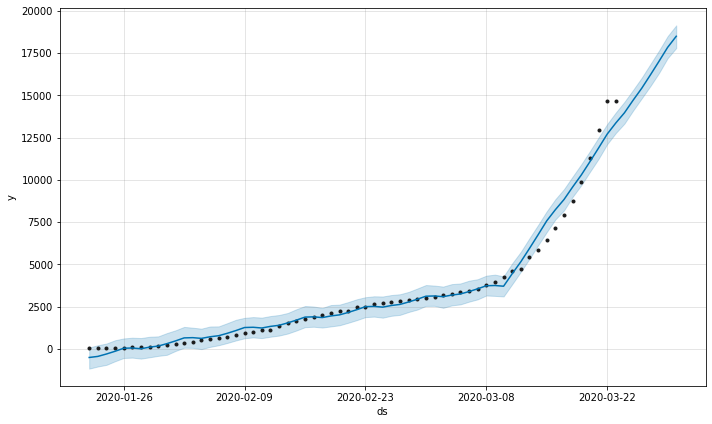

In [50]:
confirmed_forcast_plot = m.plot(forcast)

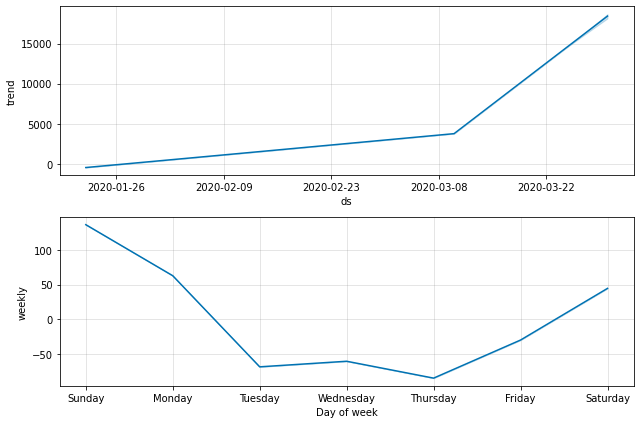

In [51]:
confirmed_forcast_plot = m.plot_components(forcast)

In [52]:
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])

In [53]:
m=Prophet()
m.fit(recovered)
future=m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [54]:
forcast = m.predict(future)
forcast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,103001.349375,101857.530236,104224.198825
65,2020-03-27,105338.022248,104091.712457,106658.944910
66,2020-03-28,108256.307711,106907.361823,109634.409540
67,2020-03-29,111119.292707,109684.808277,112621.028597
68,2020-03-30,113244.957967,111510.322212,114866.513594


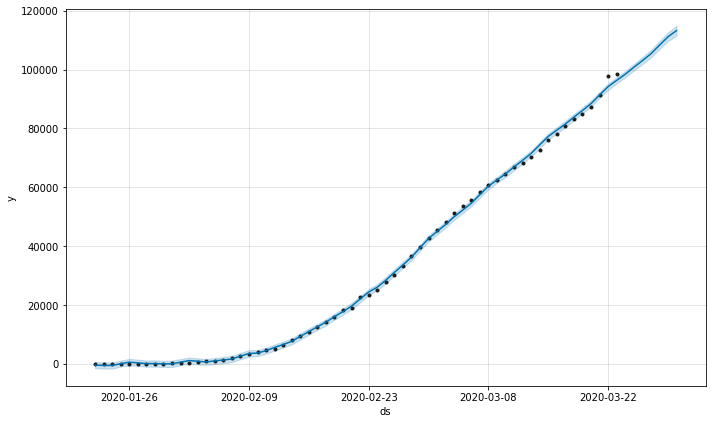

In [55]:
confirmed_forcast_plot = m.plot(forcast)

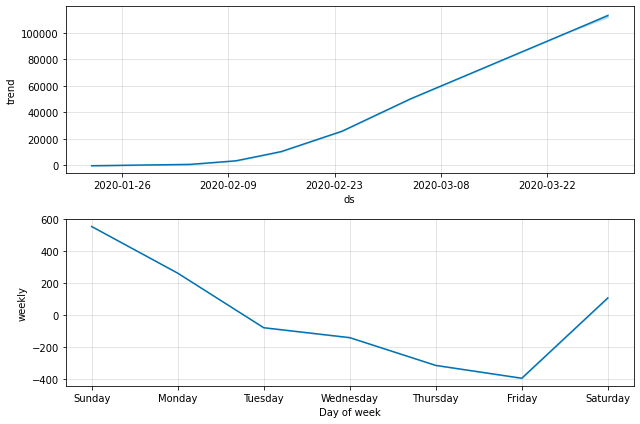

In [56]:
confirmed_forcast_plot = m.plot_components(forcast)